In [ ]:
# 유임승차 비율이 가장 높은 5개의 역을 찾으세요
# 유무임 승차 인원이 가장 높은 5개의 역을 찾으세요
# 모든 역의 유무임 승하차 비율

import csv
mon = []
with open('data-files/t-money2.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    
    for idx, row in enumerate(reader):
        # print(row)
        mon_1 = mon.append(row[4]) # list에 추가
        # sorted(mon_1, )
    
      #  if idx == 2:
       #     break
        #for cnt in row:
         #   mon.append([4])

        

In [71]:
# 선생님
# 유임승차 비율이 가장 높은 5개의 역을 찾으세요
# 유무임 승차 인원이 가장 높은 5개의 역을 찾으세요
# 모든 역의 유무임 승하차 비율

#str_to_int('1', '2', '3') -> [1, 2, 3] // ('1,000', '2,000', '3,000') -> [1000, 2000, 3000]
def str_to_int(*args): # * = 문자열이 아닌 숫자열인 정수 리스트로 잡아줌 # def (a):는 하나만 받으므로(f(a)) *을 붙이면 여러개 받음 def ~~(*~~)
    results = []
    if len(args) > 0:
        for arg in args:
            results.append(int(arg.replace(',', '')))
            
    return results

def add_list_by_element(list1, list2):
    # True일 때 사용할 값1 if 조건식 else False일 때 사용할 값2 -> 조건식이 T/F일 때 나올 값
    l, s = (list1, list2) if len(list1) >= len(list2) \
                          else (list2, list1)

    result = l.copy()
    for idx, e in enumerate(s):
            result[idx] = s[idx] + l[idx]
            
    return result
    

In [36]:
str_to_int('1,000','2,000','3,000') # 이와 같이 여러 개를 보낼 때 *에서는 하나로 묶어줌

[1000, 2000, 3000]

In [72]:
with open('data-files/t-money2.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    
    rates_by_station = {} # key value 구조( 역 : 수 )
    
    for row in reader:
        #results [0]:유임승차, [1]:유임하차, [2]:무임승차, [3]:무임하차
        results = str_to_int(row[4], row[5], row[6], row[7]) # 새로 들어온 값
        
        if row[3] in rates_by_station: # 이미 같은 역 이름이 있다면 
            prev_data = rates_by_station[row[3]] # 기존에 등록된 값
            results = add_list_by_element(prev_data, results) # 기존 값 새로운 값 더함
           
        rate1 = results[0] / ( results[0] + results[2] ) if results[0] + results[2] > 0 else -1
        rate2 = results[1] / ( results[1] + results[3] ) if results[1] + results[3] > 0 else -1
        rates_by_station[row[3]] = results[:4] + [round(rate1, 5), round(rate2, 5)]            
        
# print(rates_by_station)

In [ ]:
rates_by_station


In [75]:
sorted_rates = sorted(rates_by_station.items(),# items는 key와 value를 리스트로 가져옴 (정렬할 리스트)
                      key=lambda kv: kv[1][4], # 정렬 기준 # key -> 정렬기준 ,람다 = 이름없는 함수 #기본 정렬이 아니면 두번 째 인자에 정렬 함수를 넣으면 된다 ->items를 kv에 넣고(kv= items값) kv[1][4]에 넣어주면(리스트 1번 중 4번) 1번에서 4번 기준으로 정렬 하겠다 /유무임 승차면 k[1][0]+k[1][2]
                      reverse=True)  # 오름차순 / 내림차순

In [76]:
# rates_by_station.items() 이걸로 확인해서 kv 값 넣기
sorted_rates[:10]

[('청라국제도시', [136124, 128405, 8596, 8547, 0.9406, 0.93759]),
 ('신논현', [716430, 733811, 46978, 44730, 0.93846, 0.94255]),
 ('홍대입구', [1440517, 1525232, 95456, 92530, 0.93785, 0.9428]),
 ('한양대', [161644, 178847, 11327, 11787, 0.93452, 0.93817]),
 ('강남', [2010031, 2024007, 145213, 128063, 0.93262, 0.94049]),
 ('여의도', [1017049, 1042139, 73661, 68849, 0.93247, 0.93803]),
 ('가산디지털단지', [1322470, 1391672, 101848, 101068, 0.92849, 0.93229]),
 ('마곡나루(서울식물원)', [377856, 368354, 29499, 29070, 0.92758, 0.92685]),
 ('삼성(무역센터)', [1101158, 1134977, 89028, 82495, 0.9252, 0.93224]),
 ('한강진', [154970, 186142, 12718, 12623, 0.92416, 0.93649])]

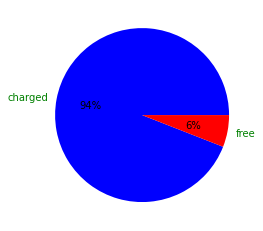

In [111]:
import matplotlib.pyplot as plt

first = sorted_rates[0]
_, texts, _ = plt.pie([first[1][4], 1 - first[1][4]], labels=['charged','free'], colors=['blue','red'], autopct='%1.f%%')

for t in texts:
    t.set_color('green') # 텍스트
    
plt.savefig(first[0] + '.png')

plt.show()